<a href="https://colab.research.google.com/github/Gabrielaan1/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Función para generar un nombre y apellido aleatorio
def generar_nombre_apellido():
  nombres = ["Juan", "Pedro", "Maria", "Ana", "Luis", "Carla", "Diego", "Sofia", "Martin", "Laura"]
  apellidos = ["Gonzalez", "Rodriguez", "Perez", "Gomez", "Lopez", "Martinez", "Fernandez", "Garcia", "Diaz", "Sanchez"]
  return random.choice(nombres), random.choice(apellidos)

# Crear una lista de diccionarios para almacenar los datos
data = []
for i in range(100):
  nombre, apellido = generar_nombre_apellido()
  dni = random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota_1er_trimestre = random.randint(1, 10)
  nota_2do_trimestre = random.randint(1, 10)
  nota_3er_trimestre = random.randint(1, 10)
  faltas = random.randint(0, 15)

  data.append({
      "Apellido": apellido,
      "Nombre": nombre,
      "Nro_DNI": dni,
      "Materia Escolar": materia,
      "Nota 1er Trimestre": nota_1er_trimestre,
      "Nota 2do Trimestre": nota_2do_trimestre,
      "Nota 3er Trimestre": nota_3er_trimestre,
      "Faltas a clases": faltas
  })

# Crear el DataFrame a partir de la lista de diccionarios
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
print(df.head())


    Apellido  Nombre   Nro_DNI Materia Escolar  Nota 1er Trimestre  \
0      Gomez   Diego  13532426            Arte                  10   
1   Martinez   Diego  27344008          Inglés                   6   
2  Rodriguez  Martin  14480293      Matemática                   3   
3     Garcia   Diego  36739242        Biología                   9   
4  Fernandez   Diego  50942173       Geografía                   3   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a clases  
0                   4                   1               13  
1                   5                   8                2  
2                   4                   8               10  
3                   7                   2                1  
4                   7                   8                6  


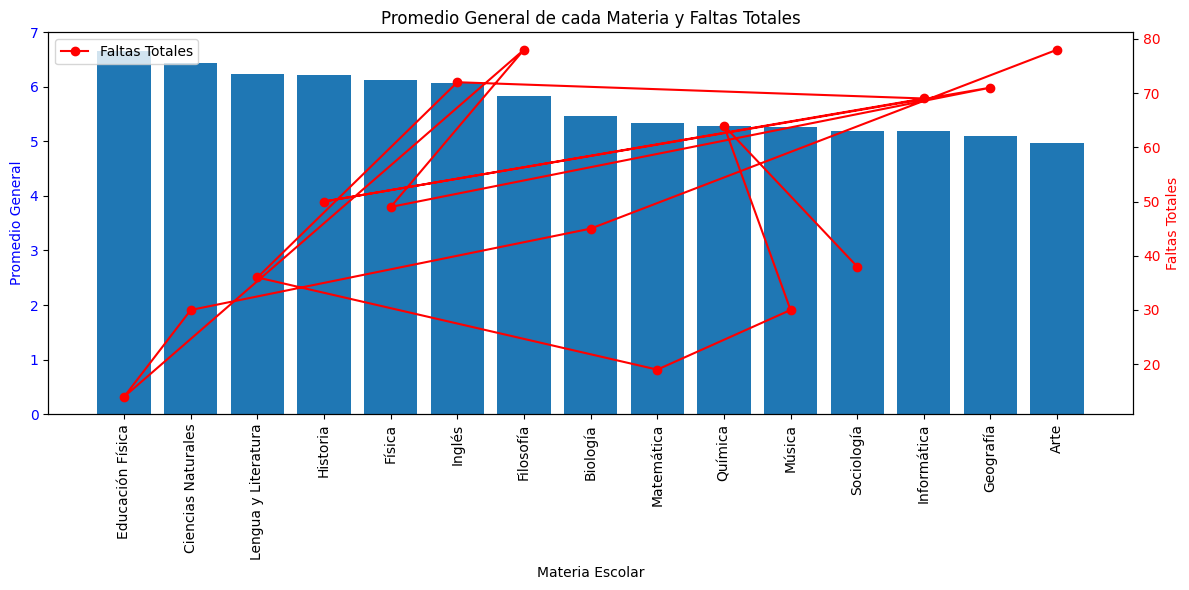

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias por promedio general de mayor a menor
promedio_por_materia_ordenado = promedio_por_materia.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar las barras del promedio general de cada materia
ax1.bar(promedio_por_materia_ordenado.index, promedio_por_materia_ordenado.values)
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Promedio General de cada Materia y Faltas Totales')
plt.xticks(rotation=90)

# Crear un segundo eje y para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')


# Agregar leyendas
plt.legend(['Faltas Totales', 'Promedio General'])

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [4]:
df.to_csv("datos_alumnos.csv", index=False)